**Load Data**

we have 25000 images of cat and dog (12500 for each) in original dataset dir but we are training that what we do when we have small dataset so we copy only 4000 images of cat and dog

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import module

import os, shutil
# os for making dir and joining path name
# shutil {pronounce: sh-util} for copying files from one place to another

from tqdm import tqdm
# tqdm for decorating the iteration

In [3]:
# Specific For Colab
base_dir = "drive/MyDrive/cats_and_dogs_small/cats_and_dogs_small"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

In [ ]:
# dir where we have images
original_dataset_dir = "originaldata/"

In [ ]:
# base dir where we want to copy the data
base_dir = "cats_and_dogs_small"

In [ ]:
# create the dir
os.mkdir(base_dir)

In [ ]:
# dir where we have images that we use to train
train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir) # make dir

In [ ]:
# dir where we have images that we used in validation of model
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir) # create dir

In [ ]:
# dir where we have images that we used to testing of model
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir) # create dir

In [ ]:
# dir where we have cats images for training
train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir) # create dir

In [ ]:
# dir where we have dogs images for training
train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir) # create dir

In [ ]:
# dir where we have cats images for validation
validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir) # create dir

In [ ]:
# dir where we have dogs images for validation
validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir) # create dir

In [ ]:
# dir where we have cats images for testing
test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir) # create dir

In [ ]:
# dir where we have dogs images for testing
test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

In [ ]:
# we have a big dataset:25000 images (12500 for each cats & dogs) each pic has prefix of its class 
#means cat images has name cat.34.jpg and same for dog class but here we learning that what should 
# we do when we have small data set so we copy only 4000 images
#   For Training:    2000 images: 1000 for each class
#   For Validation:  1000 images:  500 for each class
#   For Testing:     1000 images:  500 for each class
#                  ------------------
#                  Total : 4000 images

In [ ]:
# First, copy 1000 images of cat for training
fnames = ["cat.{}.jpg".format(i) for i in range(1000)] # list first 1000 images of cat 
for fname in tqdm(fnames): # iterate on list
    src = os.path.join(original_dataset_dir, fname) # create full path of file from working dir
    dst = os.path.join(train_cats_dir, fname) # create full destination path of file from wrok. dir
    shutil.copyfile(src, dst) # copy file

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.93it/s]


In [ ]:
# then copy next 500 images of cat for validation
fnames = ["cat.{}.jpg".format(i) for i in range(1000,1500)]
for fname in tqdm(fnames):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:11<00:00, 44.93it/s]


In [ ]:
# then copy next 500 images of cat for testing
fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in tqdm(fnames):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:26<00:00, 19.03it/s]


In [ ]:
# Copy 1000 images of dog for training
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in tqdm(fnames):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.32it/s]


In [ ]:
# copy next 500 images of dog for validation
fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in tqdm(fnames):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:17<00:00, 28.30it/s]


In [ ]:
# copy next 500 images of dog for testing
fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in tqdm(fnames):
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:15<00:00, 33.28it/s]


**Training a convnet from scratch on a small dataset Without Data Augmentation and Dropout**

In [ ]:
# Build Model
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
# Compilation of Model
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

C:\Users\Huzaifa\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
# Create Generator for bringing one batch of data at a time to increas processing speed
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
# Train the model using generator 
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

C:\Users\Huzaifa\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 145s 1s/step - loss: 0.6889 - acc: 0.5430 - val_loss: 0.6684 - val_acc: 0.6070
Epoch 2/30
100/100 [==============================] - 151s 2s/step - loss: 0.6568 - acc: 0.6100 - val_loss: 0.6406 - val_acc: 0.6580
Epoch 3/30
100/100 [==============================] - 152s 2s/step - loss: 0.6105 - acc: 0.6730 - val_loss: 0.6117 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 143s 1s/step - loss: 0.5683 - acc: 0.6995 - val_loss: 0.6545 - val_acc: 0.6380
Epoch 5/30
100/100 [==============================] - 149s 1s/step - loss: 0.5422 - acc: 0.7290 - val_loss: 0.5803 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 142s 1s/step - loss: 0.5119 - acc: 0.7465 - val_loss: 0.5879 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 153s 2s/step - loss: 0.4884 - acc: 0.7665 - val_loss: 0.5518 - val_acc: 0.7160
Epoch 8/30
100/100 [==============================] - 156s 2s/step - 

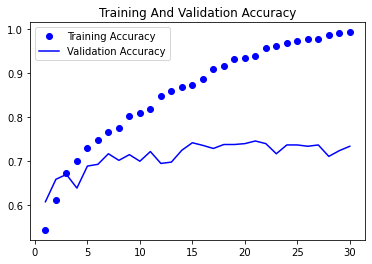

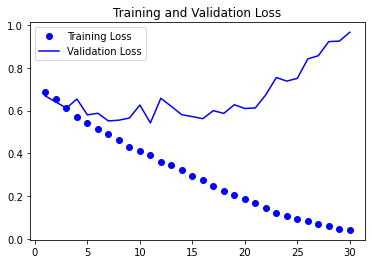

In [ ]:
# Plotting of Accuracy & Loss of Training and Validation
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training And Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

**Training a convnet from scratch on a small dataset with Data Augmentation and Dropout**

In [ ]:
# Build Model
from tensorflow.keras import models, layers, optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(62, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
# Creating Generator with Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Train the model here aurgument of steps per epoch and validation steps propagate error so we remove it
history = model.fit_generator(train_generator,
                             epochs=100,
                             validation_data=validation_generator)

C:\Users\Huzaifa\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
63/63 [==============================] - 230s 4s/step - loss: 0.6945 - acc: 0.5120 - val_loss: 0.6866 - val_acc: 0.5460
Epoch 2/100
63/63 [==============================] - 198s 3s/step - loss: 0.6911 - acc: 0.5290 - val_loss: 0.6790 - val_acc: 0.5880
Epoch 3/100
63/63 [==============================] - 200s 3s/step - loss: 0.6851 - acc: 0.5370 - val_loss: 0.6669 - val_acc: 0.5660
Epoch 4/100
63/63 [==============================] - 192s 3s/step - loss: 0.6644 - acc: 0.5900 - val_loss: 0.7138 - val_acc: 0.5220
Epoch 5/100
63/63 [==============================] - -3049s -49220584us/step - loss: 0.6598 - acc: 0.6135 - val_loss: 0.6398 - val_acc: 0.6170
Epoch 6/100
63/63 [==============================] - 208s 3s/step - loss: 0.6485 - acc: 0.6250 - val_loss: 0.6358 - val_acc: 0.6400
Epoch 7/100
63/63 [==============================] - 187s 3s/step - loss: 0.6413 - acc: 0.6230 - val_loss: 0.6187 - val_acc: 0.6450
Epoch 8/100
63/63 [==============================] - 181s 3s/step

In [ ]:
# Save Model: It is best practice to save the model after training
model.save("cats_and_dogs_small_2.h5")

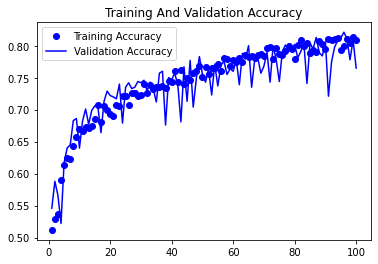

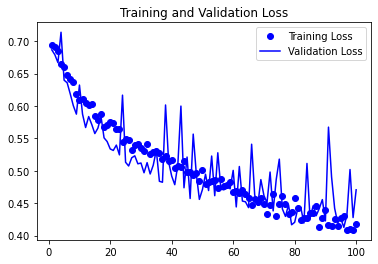

In [ ]:
# Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training And Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

**Using a pretrained convnet**

In [4]:
# Load VGG16 from keras
from tensorflow.keras.applications import VGG16

In [5]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58900480/58889256 [==============================] - 1s 0us/step


**Feature Extraction Without Data Augmentation**

Here we Predict our sample on pretrained convolution base so it give features. using these features we train our dense classifier. This technique do not allow data augmentation

In [6]:
# Extracting Features using Prediction of VGG16

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


In [7]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# To fed data into dense layer we have to flat the data
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [18]:
# Structure of Model
from tensorflow.keras import models, layers, optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
# Compilation of Model
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [20]:
# Training Of Model on features that is prediction of VGG16
history = model.fit(train_features, train_labels,
                   epochs=30, batch_size=20,
                   validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 8ms/step - loss: 0.6012 - acc: 0.6660 - val_loss: 0.4528 - val_acc: 0.8380
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4373 - acc: 0.7985 - val_loss: 0.3693 - val_acc: 0.8710
Epoch 3/30
100/100 [==============================] - 1s 7ms/step - loss: 0.3635 - acc: 0.8415 - val_loss: 0.3306 - val_acc: 0.8870
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3220 - acc: 0.8770 - val_loss: 0.3043 - val_acc: 0.8840
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2859 - acc: 0.8900 - val_loss: 0.2850 - val_acc: 0.8920
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2643 - acc: 0.8950 - val_loss: 0.2737 - val_acc: 0.8960
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2514 - acc: 0.9030 - val_loss: 0.2656 - val_acc: 0.9000
Epoch 8/30
100/100 [==============================] - 1s 6ms/step - loss: 0.

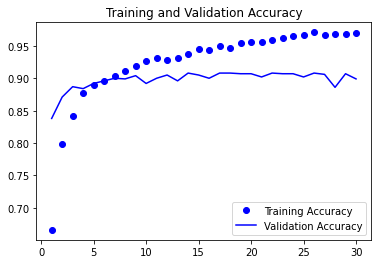

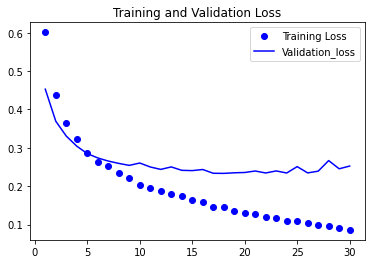

In [21]:
# Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title("Training and Validation Loss")

plt.legend()
plt.show()

**Feature Extraction With Data Augmentation**

Add Pretrained Conv base in model as a layer and freeze it, so its previous training is safe, and train the model

In [22]:
# Build Model
from tensorflow.keras import models, layers, optimizers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print("This is the number of trainable weights before freezing the conv base", len(model.trainable_weights))
conv_base.trainable = False
print("This is the number of trainable weights after freezing the conv base", len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base 30
This is the number of trainable weights after freezing the conv base 4


In [23]:
# Create Generator with data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
# Compilation Steps
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [25]:
# Training using Generator
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 30s 295ms/step - loss: 0.5806 - acc: 0.7045 - val_loss: 0.4519 - val_acc: 0.8120
Epoch 2/30
100/100 [==============================] - 29s 290ms/step - loss: 0.4866 - acc: 0.7840 - val_loss: 0.3923 - val_acc: 0.8490
Epoch 3/30
100/100 [==============================] - 29s 289ms/step - loss: 0.4453 - acc: 0.7990 - val_loss: 0.3359 - val_acc: 0.8680
Epoch 4/30
100/100 [==============================] - 29s 290ms/step - loss: 0.4082 - acc: 0.8215 - val_loss: 0.3091 - val_acc: 0.8790
Epoch 5/30
100/100 [==============================] - 29s 291ms/step - loss: 0.3823 - acc: 0.8330 - val_loss: 0.2977 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 29s 290ms/step - loss: 0.3713 - acc: 0.8355 - val_loss: 0.2846 - val_acc: 0.8940
Epoch 7/30
100/100 [==============================] - 29s 291ms/step - loss: 0.3574 - acc: 0.8455 - val_loss: 0.2884 - val_acc: 0.8750
Epoch 8/30
100/100 [==============================] - 2

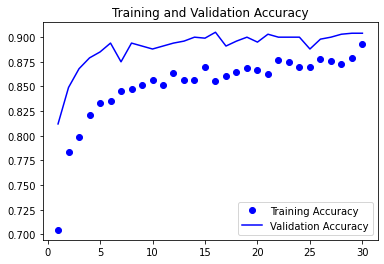

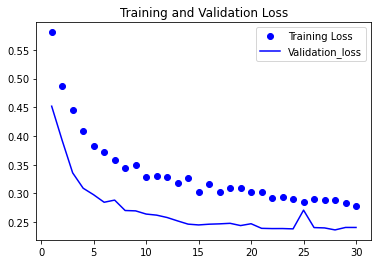

In [26]:
# Plotting results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title("Training and Validation Loss")

plt.legend()
plt.show()

**Fine Tuning**

Means freeze convolution base except some top layers and joint training with dense classifier (trained dense classifier)

In [27]:
# Freeze Conv base upto block 4 and unfreeze last block 5
conv_base.trainable = True
condition = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    condition = True
  if condition:
    layer.trainable = True
  else:
    layer.trainable = False

In [28]:
# Compilation Steps
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [29]:
# Train the model using previous generator
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data = validation_generator,
                              validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 33s 308ms/step - loss: 0.3041 - acc: 0.8685 - val_loss: 0.2216 - val_acc: 0.9110
Epoch 2/100
100/100 [==============================] - 31s 305ms/step - loss: 0.2741 - acc: 0.8825 - val_loss: 0.2029 - val_acc: 0.9280
Epoch 3/100
100/100 [==============================] - 31s 305ms/step - loss: 0.2313 - acc: 0.9055 - val_loss: 0.2579 - val_acc: 0.8950
Epoch 4/100
100/100 [==============================] - 30s 302ms/step - loss: 0.2165 - acc: 0.9100 - val_loss: 0.2130 - val_acc: 0.9150
Epoch 5/100
100/100 [==============================] - 30s 303ms/step - loss: 0.2152 - acc: 0.9080 - val_loss: 0.2001 - val_acc: 0.9270
Epoch 6/100
100/100 [==============================] - 31s 305ms/step - loss: 0.1946 - acc: 0.9265 - val_loss: 0.1955 - val_acc: 0.9270
Epoch 7/100
100/100 [==============================] - 30s 303ms/step - loss: 0.1830 - acc: 0.9255 - val_loss: 0.2320 - val_acc: 0.9150
Epoch 8/100
100/100 [===========================

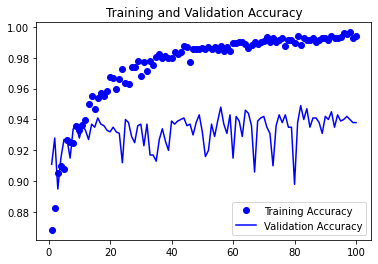

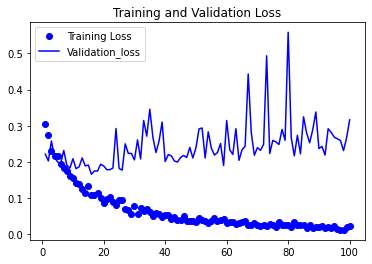

In [30]:
# Plotting Results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title("Training and Validation Loss")

plt.legend()
plt.show()

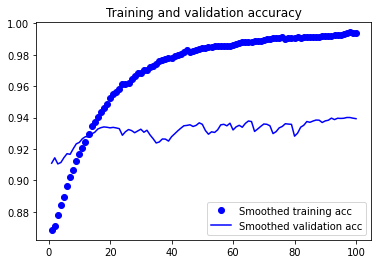

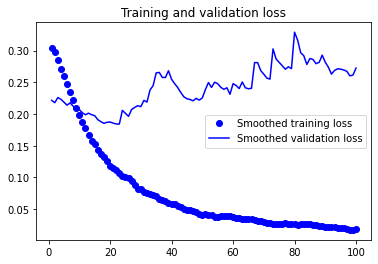

In [31]:
# Curves are so noisy we smooth it
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points: 
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
# Test the model on unseen data
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.9369999766349792
